In [1]:
%matplotlib inline
import tables
import os
import numpy as np
from icecube import dataio, dataclasses
from plot_conf import * ### Only my personal plotting settings...you can comment these lines if you want
import matplotlib.pyplot as plt

/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#folder='/data/ana/PointSource/PS/IC86_2012/files/sim/2012/neutrino-generator/11069/00000-00999/'
folder = './mc_data/'
filelist = os.listdir(folder)
filelist =[ i for i in filelist if i[-6:]=='i3.bz2']
print filelist
raw_file = dataio.I3File(os.path.join(folder, filelist[1]))

['Final_v2_nugen_numu_IC86.2012.011069.000001.i3.bz2', 'Calibrated_Waveform.i3.bz2']


In [9]:
cur=raw_file.pop_physics()
DOM_launches = cur['InIceRawData']
Calib_Waveform = cur['CalibratedWaveforms']
Lepton = cur['MCMostEnergeticTrack']
InIcePulses = cur['InIceDSTPulses'].apply(cur)
print(' Energy of Lepton (Track) : {:.2f} TeV'.format(Lepton.energy/1e3))

 Energy of Lepton (Track) : 265.91 TeV


Overall 418 DOM launches recorded with charge 387.700000614 PE 
 -----------------------
Saved to Pulse_Dist_265_91.pdf


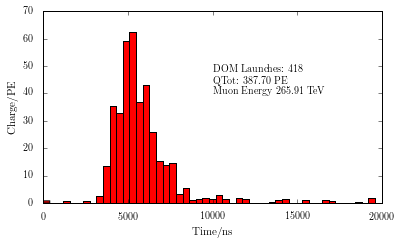

In [35]:
time=[]
charge=[]
atwd=dict()
fadc = dict()
atwd_calib = dict()
fadc_calib = dict()
DOM = []
for i, key in enumerate(DOM_launches.keys()):
    x=DOM_launches[key][0]
    DOM.append(key)
    atwd[key] = x.raw_atwd
    fadc[key] = x.raw_fadc
    for j in range(len(Calib_Waveform[key])):
        if str(Calib_Waveform[key][j].source) == 'ATWD':
            atwd_calib[key] = Calib_Waveform[key][j]
        if str(Calib_Waveform[key][j].source) == 'FADC':
            fadc_calib[key] = Calib_Waveform[key][j]
    time.append(InIcePulses[key][0].time)
    charge.append(InIcePulses[key][0].charge)
time = np.array(time) - np.min(time)

print('Overall {} DOM launches recorded with charge {} PE \n -----------------------'.format(len(time), np.sum(charge)))
### Overall collected charge as a function of time #####
fig, ax = newfig(0.9)
ax.hist(time, weights=charge, bins=50)
ax.set_xlabel('Time/ns')
ax.set_ylabel('Charge/PE')
plt.text(ax.get_xticks()[-3], ax.get_yticks()[-4], 'DOM Launches: {}\n QTot: {:.2f} PE \n Muon Energy {:.2f} TeV'.format(len(time), np.sum(charge),Lepton.energy/1e3))
saveto='Pulse_Dist_{}.pdf'.format(str(round(Lepton.energy/1e3, 2)).replace('.','_'))
plt.savefig(saveto)
print('Saved to {}'.format(saveto))
plt.show()

In [26]:
# DOM Launches
time_order = np.argsort(time)
# for launch in time_order:
#     print('DOM {} launched at {} ns'.format(DOM[launch], time[launch]))

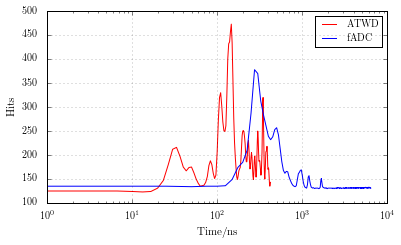

In [38]:
### Charge of one DOM #####

fig, ax = newfig(0.9)
for i in [10]: #range(len(time_order)):
    DOM_id = time_order[i]
    omkey = DOM[DOM_id]
    #print('Waveform for DOM {}'.format(omkey))

    ###rates from https://arxiv.org/abs/1612.05093
    rate_atwd = 10./3.
    rate_fadc = 100./4.

    plt.plot(np.arange(len(atwd[omkey][0]))*rate_atwd, atwd[omkey][0], color = 'red', label = 'ATWD')
    plt.plot(np.arange(len(fadc[omkey]))*rate_fadc, fadc[omkey], color = 'blue' , label = 'fADC')


plt.legend(loc='best')
plt.grid(True)
ax.set_xlabel(r'Time/ns')
ax.set_ylabel(r'Hits')
ax.set_xscale('log')
plt.savefig('Waveform_1DOM.pdf')
plt.show()

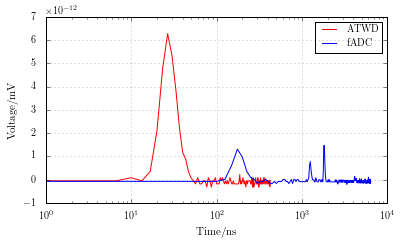

In [37]:
### Charge of one DOM #####

fig, ax = newfig(0.9)
for i in [10]: #range(len(time_order)):
    DOM_id = time_order[i]
    omkey = DOM[DOM_id]
    #print('Waveform for DOM {}'.format(omkey))

    ###rates from https://arxiv.org/abs/1612.05093
    rate_atwd = 10./3.
    rate_fadc = 100./4.

    plt.plot(np.arange(len(atwd_calib[omkey].waveform))*rate_atwd, atwd_calib[omkey].waveform, color = 'red', label = 'ATWD')
    plt.plot(np.arange(len(fadc_calib[omkey].waveform))*rate_fadc, fadc_calib[omkey].waveform, color = 'blue' , label = 'fADC')


plt.legend(loc='best')
plt.grid(True)
ax.set_xlabel(r'Time/ns')
ax.set_ylabel(r'Voltage/mV')
ax.set_xscale('log')
plt.savefig('Waveform_1DOM_calib.pdf')
plt.show()

In [12]:
keys=Calib_Waveform.keys()

In [13]:
atwd_calib=Calib_Waveform[keys[0]][0]